<a href="https://colab.research.google.com/github/dafne-coconi/complexy-graph/blob/main/MNIST_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import numpy as np

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

training_subset = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8, 1]
number_neurons = [50, 100, 200]

matrix_error_train_mean = np.zeros([len(number_neurons), len(training_subset)])
matrix_error_test_mean = np.zeros([len(number_neurons), len(training_subset)])

for neurons in range(len(number_neurons)):
  e_train = list()
  e_test = list()
  for j in range(len(training_subset)):
    # Subsampling: Reduce the dataset size
    subset_size = int(training_subset[j] * len(train_dataset))  # Use 10% of the data
    subset_indices = np.random.choice(len(train_dataset), subset_size, replace=False)
    train_subset = Subset(train_dataset, subset_indices)

    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset=train_subset, batch_size=128, shuffle=True)

    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

    # Define the model: Single-layer neural network (perceptron)
    class SingleLayerNN(nn.Module):
        def __init__(self, input_size, num_classes, num_neurons):
            super(SingleLayerNN, self).__init__()
            self.linear = nn.Linear(input_size, num_neurons)
            self.output_layer = nn.Linear(num_neurons, num_classes)

        def forward(self, x):
            x = x.view(-1, 28*28)  # Flatten the image into a vector
            out = self.linear(x)
            out = torch.relu(out)
            out = self.output_layer(out)
            return out

    # Hyperparameters
    input_size = 28 * 28  # Image size (28x28 pixels)
    num_classes = 10  # Digits (0-9)
    learning_rate = 0.01
    num_epochs = 5
    print(neurons)
    num_neurons = number_neurons[neurons]

    # Initialize model, loss, and optimizer
    model = SingleLayerNN(input_size, num_classes, num_neurons)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        error = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            error += (predicted != labels).sum().item()
            total += labels.size(0)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    error_train = 100 * error / total
    e_train.append(error_train)
    print(f'Error of the model on train images: {error_train}%')


    # Testing loop
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            error += (predicted != labels).sum().item()

        print(f'Error of the model on the test images: {100 * error / total}%')
    e_test.append(100 * error / total)
  matrix_error_train_mean[neurons] = e_train
  matrix_error_test_mean[neurons] = e_test



0
Epoch [1/5], Loss: 2.272663974761963
Epoch [2/5], Loss: 2.221531534194946
Epoch [3/5], Loss: 2.1785555839538575
Epoch [4/5], Loss: 2.1388669490814207
Epoch [5/5], Loss: 2.0972455978393554
Error of the model on train images: 62.0%
Error of the model on the test images: 68.29%
0
Epoch [1/5], Loss: 2.239661912123362
Epoch [2/5], Loss: 2.050436412294706
Epoch [3/5], Loss: 1.8581710358460743
Epoch [4/5], Loss: 1.664209673802058
Epoch [5/5], Loss: 1.4816590249538422
Error of the model on train images: 30.033333333333335%
Error of the model on the test images: 39.66%
0
Epoch [1/5], Loss: 2.1051921464027243
Epoch [2/5], Loss: 1.717988557003914
Epoch [3/5], Loss: 1.3687485025284138
Epoch [4/5], Loss: 1.1068465481413172
Epoch [5/5], Loss: 0.925051601643258
Error of the model on train images: 18.966666666666665%
Error of the model on the test images: 28.05%
0
Epoch [1/5], Loss: 2.026857977217816
Epoch [2/5], Loss: 1.3747159356766558
Epoch [3/5], Loss: 0.9186368768519544
Epoch [4/5], Loss: 0.701

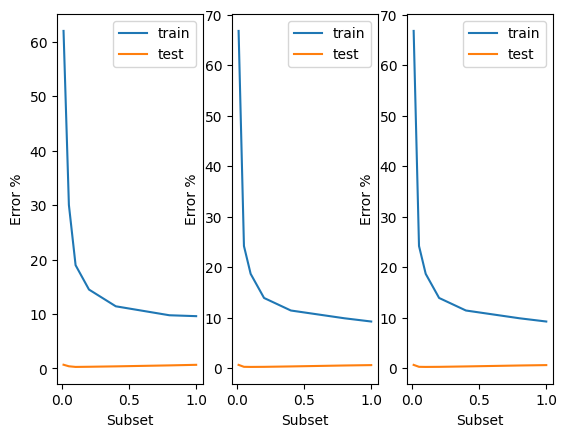

In [52]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(training_subset, matrix_error_train_mean[0])
plt.plot(training_subset, matrix_error_test_mean[0]/100)
plt.xlabel("Subset")
plt.ylabel("Error %")
plt.legend(["train", "test"], loc="upper right")

plt.subplot(1,3,2)
plt.plot(training_subset, matrix_error_train_mean[1])
plt.plot(training_subset, matrix_error_test_mean[1]/100)
plt.xlabel("Subset")
plt.ylabel("Error %")
plt.legend(["train", "test"], loc="upper right")

plt.subplot(1,3,3)
plt.plot(training_subset, matrix_error_train_mean[1])
plt.plot(training_subset, matrix_error_test_mean[1]/100)
plt.xlabel("Subset")
plt.ylabel("Error %")
plt.legend(["train", "test"], loc="upper right")